In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 그래프 작성 라이브러리 및 한글 폰트 지정을 위한 코드를 실행합니다. 
import matplotlib
from matplotlib import font_manager, rc
import platform


%matplotlib inline

# 이미지 한글 표시 설정
if platform.system() == 'Windows':  # 윈도우인 경우 맑은고딕
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    # Mac 인 경우 애플고딕
    rc('font', family='AppleGothic')

# 위에 안 될 시 아래 코드로 실행해주세요    
# matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic')

#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
# pd.read_csv("경로/파일이름.확장자")
data = pd.read_csv("dataset2.csv")

In [5]:
data.head()

,고객코드,질병,질병 수,나이,성별,가입일,마지막활동일,활동기간,활동주기,활동지수
0,1,ALS,2,20,1,2019-05-02,2020-02-07,281,2,0.000
1,2,ALS,2,30,1,2019-12-30,2020-03-08,69,3,0.003
2,3,ALS,5,30,0,2019-01-25,2020-10-29,643,1,0.097
3,4,ALS,4,30,0,2018-03-28,2019-12-13,625,1,0.186
4,5,ALS,5,40,1,2018-10-20,2019-11-30,406,2,0.010


In [6]:
data.shape

(300, 10)

In [18]:
def get_grade(data):
    if (data >= 120):
        return '1'
    else:
        return '0'

In [20]:
data['이탈여부'] = data['활동기간'].apply(get_grade)

In [21]:
x_features = data[ ['질병 수','활동주기','활동지수'] ]
y_label = data['이탈여부']

In [22]:
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_label, test_size=0.3, random_state=22)

In [24]:
dt = DecisionTreeClassifier(random_state = 22)

In [25]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=22)

In [26]:
dt.predict(x_test)

array(['1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0',
       '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0',
       '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1',
       '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1',
       '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1'],
      dtype=object)

In [27]:
y_pred = dt.predict(x_test)

In [28]:
confusion_matrix(y_test, y_pred)

array([[ 3, 19],
       [20, 48]], dtype=int64)

In [29]:
accuracy_score(y_test, y_pred)

0.5666666666666667

In [30]:
dt.feature_importances_

array([0.36920888, 0.12407507, 0.50671605])

질병 수 : 0.369
활동주기 : 0.124
활동지수 : 0.507


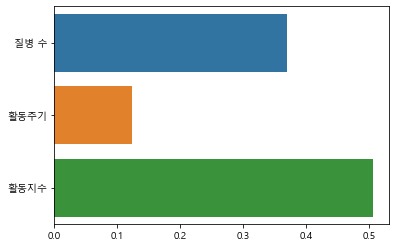

In [31]:
for name, value in zip(x_features.columns, dt.feature_importances_):
    print("{0} : {1:.3f}".format(name, value))
sns.barplot(x=dt.feature_importances_, y = x_features.columns)

In [32]:
!pip install pydotplus
!pip install graphviz

  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp36-none-any.whl size=24572 sha256=5952d0fd8d55637b56002bf183bad9770e580b2c8a20223a719887efbcb30b77
  Stored in directory: C:\Users\tkdal\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [33]:
import pydotplus

from sklearn.tree import export_graphviz

from IPython.core.display import Image

In [36]:
dot_data = export_graphviz(dt, out_file=None,

                           feature_names=x_train.columns,

                           class_names=dt.classes_,

                           filled=True, rounded=True,

                           special_characters=True)

In [40]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<활동지수 &le; 0.082<br/>gini = 0.363<br/>samples = 210<br/>value = [50, 160]<br/>class = 1>, fillcolor="#77bced"] ;\n1 [label=<활동지수 &le; 0.073<br/>gini = 0.4<br/>samples = 141<br/>value = [39, 102]<br/>class = 1>, fillcolor="#85c2ef"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<질병 수 &le; 12.5<br/>gini = 0.382<br/>samples = 136<br/>value = [35, 101]<br/>class = 1>, fillcolor="#7ebfee"] ;\n1 -> 2 ;\n3 [label=<활동지수 &le; 0.066<br/>gini = 0.371<br/>samples = 134<br/>value = [33, 101]<br/>class = 1>, fillcolor="#7abded"] ;\n2 -> 3 ;\n4 [label=<질병 수 &le; 1.5<br/>gini = 0.387<br/>samples = 126<br/>value = [33, 93]<br/>class = 1>, fillcolor="#7fc0ee"] ;\n3 -> 4 ;\n5 [label=<활동지수 &le; 0.021<br/>gini = 0.444<br/>samples = 3<br/>value = [2, 1]<br/>class = 0>, fillcolor="#f2c09c"] ;\n4 -> 5 ;\n6 [label=<gini = 0.0<br/>samples = 1<br/>val

In [41]:

graph = pydotplus.graph_from_dot_data(dot_data)

# Image(graph.create_png())

In [42]:
Image(graph.create_png())

InvocationException: GraphViz's executables not found